In [151]:
import lmfit
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

In [152]:
# data
x = np.linspace(1, 10, 250)
np.random.seed(0)
y = 3.0*np.exp(-x/2) - 5.0*np.exp(-(x-0.1)/10.) + 0.1*np.random.randn(x.size)

In [153]:
p = lmfit.Parameters()
p.add_many(('a1', 4.), ('a2', 4.), ('t1', 3.), ('t2', 3.))

def residual(p):
    return p['a1']*np.exp(-x/p['t1']) + p['a2']*np.exp(-(x-0.1)/p['t2']) - y

# create Minimizer
mini = lmfit.Minimizer(residual, p, nan_policy='propagate')

# first solve with Nelder-Mead algorithm
out1 = mini.minimize(method='Nelder')

# then solve with Levenberg-Marquardt using the
# Nelder-Mead solution as a starting point
out2 = mini.minimize(method='leastsq', params=out1.params)

lmfit.report_fit(out2.params, min_correl=0.5)

[[Variables]]
    a1:  2.98622120 +/- 0.14867187 (4.98%) (init = 2.986237)
    a2: -4.33526327 +/- 0.11527506 (2.66%) (init = -4.335256)
    t1:  1.30994233 +/- 0.13121177 (10.02%) (init = 1.309932)
    t2:  11.8240351 +/- 0.46316470 (3.92%) (init = 11.82408)
[[Correlations]] (unreported correlations are < 0.500)
    C(a2, t2) =  0.987
    C(a2, t1) = -0.925
    C(t1, t2) = -0.881
    C(a1, t1) = -0.599


In [154]:
ci = lmfit.conf_interval(mini, out2, sigmas=[1, 2])
lmfit.printfuncs.report_ci(ci)

       95.45%    68.27%    _BEST_    68.27%    95.45%
 a1:  -0.27286  -0.14165   2.98622  +0.16353  +0.36343
 a2:  -0.30444  -0.13219  -4.33526  +0.10688  +0.19683
 t1:  -0.23392  -0.12494   1.30994  +0.14660  +0.32369
 t2:  -1.01943  -0.48820  11.82404  +0.46041  +0.90441


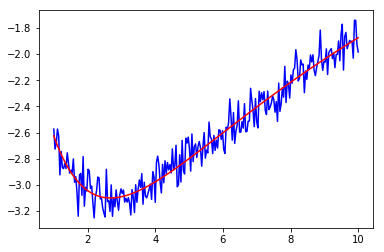

In [155]:
# plot data and best fit
plt.figure()
plt.plot(x, y, 'b')
plt.plot(x, residual(out2.params) + y, 'r-')

In [156]:
def func(x, a1, t1, a2, t2):
    """1-d gaussian: gaussian(x, amp, cen, wid)"""
    return a1*np.exp(-x/t1) + a2*np.exp(-(x-0.1)/t2)


gmodel = lmfit.Model(func)
result = gmodel.fit(y, x=x, a1=2.9, t1=1.3, a2=-4.3, t2=11.8)
print(result.fit_report())

[[Model]]
    Model(func)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 250
    # variables        = 4
    chi-square         = 2.33333982
    reduced chi-square = 0.00948512
    Akaike info crit   = -1160.54007
    Bayesian info crit = -1146.45423
[[Variables]]
    a1:  2.98622127 +/- 0.14867230 (4.98%) (init = 2.9)
    t1:  1.30994226 +/- 0.13121189 (10.02%) (init = 1.3)
    a2: -4.33526322 +/- 0.11527481 (2.66%) (init = -4.3)
    t2:  11.8240353 +/- 0.46316380 (3.92%) (init = 11.8)
[[Correlations]] (unreported correlations are < 0.100)
    C(a2, t2) =  0.987
    C(t1, a2) = -0.925
    C(t1, t2) = -0.881
    C(a1, t1) = -0.599
    C(a1, a2) =  0.277
    C(a1, t2) =  0.211


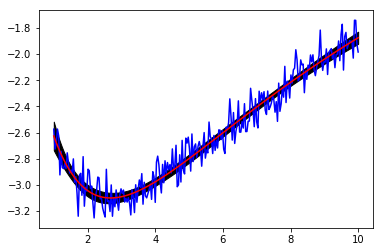

In [157]:
plt.plot(x, y, 'b')
plt.plot(x, residual(out2.params) + y, 'r-')

dely = result.eval_uncertainty(sigma=3)
plt.fill_between(x, result.best_fit-dely, result.best_fit+dely, color="k")

## Minuit

In [158]:
from iminuit import Minuit
from pprint import pprint # we use this to pretty print some stuff later

In [180]:
def least_squares(a1, t1, a2, t2):
    chi2 = np.sum((func(x, a1, t1, a2, t2) - y)**2)
    return chi2

kwdarg = dict(a1=2.9, t1=1.3, a2=-4.3, t2=11.8)

m = Minuit(least_squares, **kwdarg, errordef=chi2.cdf(0.6827, 4))
#m = Minuit(least_squares, **kwdarg)

/Users/chwei/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/ipykernel_launcher.py:7: InitialParamWarning: Parameter a1 is floating but does not have initial step size. Assume 1.
  import sys
/Users/chwei/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/ipykernel_launcher.py:7: InitialParamWarning: Parameter t1 is floating but does not have initial step size. Assume 1.
  import sys
/Users/chwei/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/ipykernel_launcher.py:7: InitialParamWarning: Parameter a2 is floating but does not have initial step size. Assume 1.
  import sys
/Users/chwei/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/ipykernel_launcher.py:7: InitialParamWarning: Parameter t2 is floating but does not have initial step size. Assume 1.
  import sys


In [181]:
chi2.cdf(0.6827, 4)

0.046554897668474586

In [182]:
m.get_param_states()

------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | a1   |    2.9    |    1.0    |            |            |         |         |       |
| 1 | t1   |    1.3    |    1.0    |            |            |         |         |       |
| 2 | a2   |   -4.3    |    1.0    |            |            |         |         |       |
| 3 | t2   |   11.8    |    1.0    |            |            |         |         |       |
------------------------------------------------------------------------------------------

In [183]:
m.migrad()

------------------------------------------------------------------
| FCN = 2.333                   |     Ncalls=101 (101 total)     |
| EDM = 2.09E-06 (Goal: 4.65549E-07)|            up = 0.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | a1   |    3.0    |    0.3    |            |            |         |         |       |
| 1 | t1   |   1.31    |   0.29    |            |            |         |         |       |
| 2 | a2   |   -4.33   |    0.25   |            |            |         |         |       |
| 3 | t2   |   11.8    |    1.0    |            |            |         |         |       |
------------------------------------------------------------------------------------------

In [184]:
m.minos()

-------------------------------------------------
|       a1        |            Valid            |
-------------------------------------------------
|      Error      |    -0.30     |     0.41     |
|      Valid      |     True     |     True     |
|    At Limit     |    False     |    False     |
|     Max FCN     |    False     |    False     |
|     New Min     |    False     |    False     |
-------------------------------------------------
-------------------------------------------------
|       t1        |            Valid            |
-------------------------------------------------
|      Error      |    -0.25     |     0.37     |
|      Valid      |     True     |     True     |
|    At Limit     |    False     |    False     |
|     Max FCN     |    False     |    False     |
|     New Min     |    False     |    False     |
-------------------------------------------------
-------------------------------------------------
|       a2        |            Valid            |
-------------------------------------------------
|      Error      |    -0.35     |     0.21     |
|      Valid      |     True     |     True     |
|    At Limit     |    False     |    False     |
|     Max FCN     |    False     |    False     |
|     New Min     |    False     |    False     |
-------------------------------------------------
-------------------------------------------------
|       t2        |            Valid            |
-------------------------------------------------
|      Error      |     -1.1     |      1.0     |
|      Valid      |     True     |     True     |
|    At Limit     |    False     |    False     |
|     Max FCN     |    False     |    False     |
|     New Min     |    False     |    False     |
-------------------------------------------------

In [185]:
m.get_param_states()

------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | a1   |    2.99   |    0.34   |   -0.30    |    0.41    |         |         |       |
| 1 | t1   |    1.31   |    0.29   |   -0.25    |    0.37    |         |         |       |
| 2 | a2   |   -4.33   |    0.25   |   -0.35    |    0.21    |         |         |       |
| 3 | t2   |    11.8   |    1.0    |    -1.1    |     1.0    |         |         |       |
------------------------------------------------------------------------------------------

In [150]:
pprint(m.get_param_states())

[Param(number=0, name='a1', value=2.9857881977941703, error=0.33992036213282306, is_const=False, is_fixed=False, has_limits=False, has_lower_limit=False, has_upper_limit=False, lower_limit=None, upper_limit=None),
 Param(number=1, name='t1', value=1.3092553462595673, error=0.2909874163990568, is_const=False, is_fixed=False, has_limits=False, has_lower_limit=False, has_upper_limit=False, lower_limit=None, upper_limit=None),
 Param(number=2, name='a2', value=-4.334528112796127, error=0.2534950757312915, is_const=False, is_fixed=False, has_limits=False, has_lower_limit=False, has_upper_limit=False, lower_limit=None, upper_limit=None),
 Param(number=3, name='t2', value=11.82621123740922, error=1.0294192482653841, is_const=False, is_fixed=False, has_limits=False, has_lower_limit=False, has_upper_limit=False, lower_limit=None, upper_limit=None)]


In [166]:
m.migrad_ok()

True

In [167]:
m.matrix_accurate()

True